In [19]:
import pandas as pd

In [20]:
import mysql.connector
from mysql.connector import Error

import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="waleedahmed",
  database="us_boxing"
)

In [52]:
cur = mydb.cursor()
cat ="SELECT oi.item_updated_at,oi.sku_id,oi.item_status,oi.sub_total,pc.cat_id,c.name FROM order_items oi INNER JOIN product_categories pc ON pc.product_id=oi.sku_id INNER JOIN category c ON pc.cat_id=c.id"
cur.execute(cat)
df_cat= pd.DataFrame(data=cur.fetchall(),columns=['date','sku_id','status','sub_total','category_id','category_name'])
df_cat.head(50)

,date,sku_id,status,sub_total,category_id,category_name
0,2019-10-09 09:18:40,5058,canceled,49.00,1,Gloves
1,2019-12-23 07:37:08,5181,canceled,3.00,1,Gloves
2,2019-10-04 23:14:55,5056,shipped,149.95,1,Gloves
3,2019-10-04 05:15:23,5133,shipped,119.95,1,Gloves
4,2019-09-30 22:05:26,5696,shipped,169.95,1,Gloves
5,2019-09-30 22:05:26,5125,shipped,59.95,20,Head Guards
6,2019-09-30 03:23:15,5124,shipped,59.95,20,Head Guards
7,2019-09-29 22:22:39,5041,shipped,169.95,1,Gloves
8,2019-09-29 22:22:39,5133,shipped,119.95,1,Gloves
9,2019-09-29 22:22:39,5124,shipped,59.95,20,Head Guards


In [54]:
df_cat.drop(df_cat[df_cat['status']=='canceled'].index, inplace = True)

In [55]:
df_cat['year']=df_cat['date'].dt.year
df_cat['month']=df_cat['date'].dt.month
df_cat['day']=df_cat['date'].dt.day

In [56]:
twenty_twenty=df_cat.query('year==2020')

In [57]:
twenty_twenty['category_name'].value_counts()

Gloves         4993
Hand Wraps       12
Head Guards       4
Head Gear         3
Focus Mitts       2
Name: category_name, dtype: int64

In [58]:
import seaborn as sns

conditions_category = [
    (twenty_twenty['month']>=1) & (twenty_twenty['month']<= 3),
    (twenty_twenty['month']>=4) & (twenty_twenty['month']<= 6),
    (twenty_twenty['month']>=7) & (twenty_twenty['month']<= 9),
    (twenty_twenty['month']>=10) & (twenty_twenty['month']<= 12)]
values_cat = ['Q1', 'Q2', 'Q3', 'Q4']
import numpy as np
twenty_twenty['quarter'] = np.select(conditions_category, values_cat)

<ipython-input-58-3bf7699fa811>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_twenty['quarter'] = np.select(conditions_category, values_cat)


In [59]:
conditions_2020_halfyearly = [
    (twenty_twenty['month']>=1) & (twenty_twenty['month'] <= 6),
    (twenty_twenty['month'] >=7) & (twenty_twenty['month'] <= 12)]
values_2020_half_yearly = ['1st_half', '2nd_half']
twenty_twenty['half_yearly'] = np.select(conditions_2020_halfyearly, values_2020_half_yearly)

<ipython-input-59-7ebdbd96cd4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_twenty['half_yearly'] = np.select(conditions_2020_halfyearly, values_2020_half_yearly)


In [60]:
sales_category=twenty_twenty.groupby(['category_name','quarter'])['sub_total'].sum()
sales_category=pd.DataFrame(sales_category)


In [61]:
sales_category.reset_index(inplace=True)

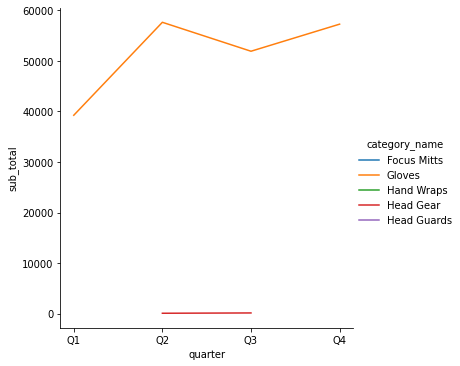

In [62]:
sns.relplot(
    data=sales_category, x="quarter", y="sub_total",hue='category_name',
    kind="line"
)

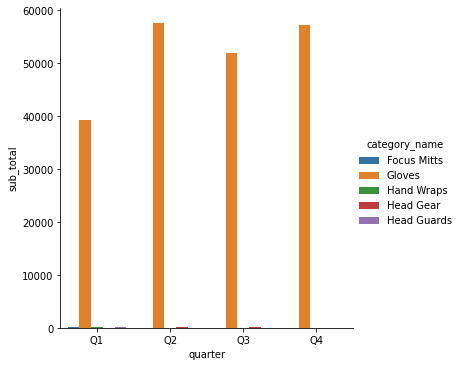

In [63]:
sns.catplot(x="quarter", y="sub_total",hue='category_name',
    kind="bar",data=sales_category
)

In [64]:
sales_category_half=twenty_twenty.groupby(['category_name','half_yearly'])['sub_total'].sum()
sales_category_half=pd.DataFrame(sales_category_half)

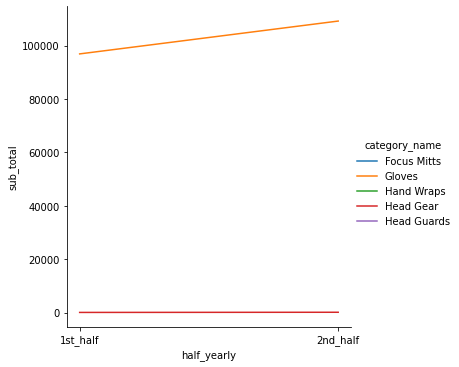

In [65]:
sns.relplot(
    data=sales_category_half, x="half_yearly", y="sub_total",hue='category_name',
    kind="line"
)

In [66]:
twenty_one=df_cat.query('year==2021')

In [67]:
twenty_one

,date,sku_id,status,sub_total,category_id,category_name,year,month,day
4887,2021-01-01 19:56:41,5110,completed,29.95,1,Gloves,2021,1,1
5377,2021-01-11 10:25:02,5110,completed,89.85,1,Gloves,2021,1,11
5378,2021-01-11 10:25:02,5926,completed,89.85,1,Gloves,2021,1,11
5517,2021-01-01 19:55:10,5087,shipped,34.95,1,Gloves,2021,1,1
5583,2021-01-06 14:49:28,5136,completed,99.99,1,Gloves,2021,1,6
...,...,...,...,...,...,...,...,...,...
8496,2021-07-01 01:08:42,5071,pending,39.95,1,Gloves,2021,7,1
8497,2021-07-01 01:34:53,5150,pending,79.95,1,Gloves,2021,7,1
8498,2021-07-01 03:34:20,10717,pending,29.99,1,Gloves,2021,7,1
8499,2021-07-01 04:19:25,10706,pending,22.99,1,Gloves,2021,7,1


In [68]:
import seaborn as sns

conditions_category_2021 = [
    (twenty_one['month']>=1) & (twenty_one['month']<= 3),
    (twenty_one['month']>=4) & (twenty_one['month']<= 6),
    (twenty_one['month']>=7) & (twenty_one['month']<= 9),
    (twenty_one['month']>=10) & (twenty_one['month']<= 12)]
values_cat_2021 = ['Q1', 'Q2', 'Q3', 'Q4']
import numpy as np
twenty_one['quarter'] = np.select(conditions_category_2021, values_cat_2021)

<ipython-input-68-864f53111c28>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_one['quarter'] = np.select(conditions_category_2021, values_cat_2021)


In [69]:
conditions_2021_halfyearly = [
    (twenty_one['month']>=1) & (twenty_one['month'] <= 6),
    (twenty_one['month'] >=7) & (twenty_one['month'] <= 12)]
values_2021_half_yearly = ['1st_half', '2nd_half']
twenty_one['half_yearly'] = np.select(conditions_2021_halfyearly, values_2021_half_yearly)

<ipython-input-69-1d7e8039e965>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_one['half_yearly'] = np.select(conditions_2021_halfyearly, values_2021_half_yearly)


In [70]:
sales_category_2021=twenty_one.groupby(['category_name','quarter'])['sub_total'].sum()
sales_category_2021=pd.DataFrame(sales_category_2021)


In [71]:
sales_category_2021

sub_total
category_name quarter          
Gloves        Q1       24825.18
              Q2       75252.38
              Q3         572.10

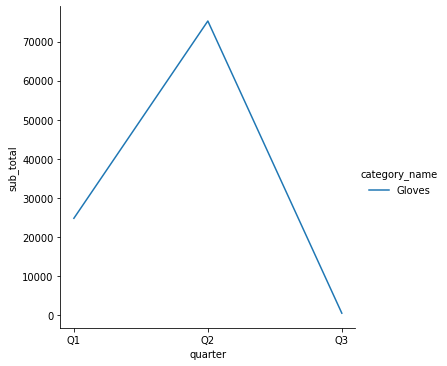

In [72]:
sns.relplot(
    data=sales_category_2021, x="quarter", y="sub_total",hue='category_name',
    kind="line"
)

In [73]:
sales_category_half_2021=twenty_one.groupby(['category_name','half_yearly'])['sub_total'].sum()
sales_category_half_2021=pd.DataFrame(sales_category_half_2021)

In [74]:
sales_category_half_2021

sub_total
category_name half_yearly           
Gloves        1st_half     100077.56
              2nd_half        572.10

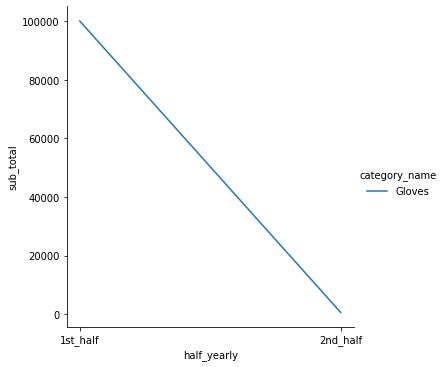

In [75]:
sns.relplot(
    data=sales_category_half_2021, x="half_yearly", y="sub_total",hue='category_name',
    kind="line"
)

In [83]:
twenty_ninteen=df_cat.query('year==2019')

In [84]:
import seaborn as sns

conditions_category_2019 = [
    (twenty_ninteen['month']>=1) & (twenty_ninteen['month']<= 3),
    (twenty_ninteen['month']>=4) & (twenty_ninteen['month']<= 6),
    (twenty_ninteen['month']>=7) & (twenty_ninteen['month']<= 9),
    (twenty_ninteen['month']>=10) & (twenty_ninteen['month']<= 12)]
values_cat_2019 = ['Q1', 'Q2', 'Q3', 'Q4']
import numpy as np
twenty_ninteen['quarter'] = np.select(conditions_category_2019, values_cat_2019)

<ipython-input-84-527f5b94737b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_ninteen['quarter'] = np.select(conditions_category_2019, values_cat_2019)


In [85]:
conditions_2019_halfyearly = [
    (twenty_ninteen['month']>=1) & (twenty_ninteen['month'] <= 6),
    (twenty_ninteen['month'] >=7) & (twenty_ninteen['month'] <= 12)]
values_2019_half_yearly = ['1st_half', '2nd_half']
twenty_ninteen['half_yearly'] = np.select(conditions_2019_halfyearly, values_2019_half_yearly)

<ipython-input-85-c9c145c27de5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_ninteen['half_yearly'] = np.select(conditions_2019_halfyearly, values_2019_half_yearly)


In [86]:
sales_category_2019=twenty_ninteen.groupby(['category_name','quarter'])['sub_total'].sum()
sales_category_2019=pd.DataFrame(sales_category_2019)

In [87]:
sales_category_2019

sub_total
category_name        quarter          
Bag / Fitness Gloves Q4         502.57
Focus Mitts          Q4          99.98
Gloves               Q1          39.99
                     Q2         269.97
                     Q3        5221.87
                     Q4       27317.08
Hand Wraps           Q4          19.95
Head Guards          Q3         179.85
Sparring Gloves      Q4          88.00

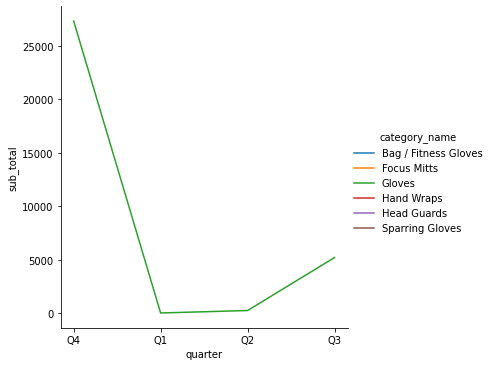

In [88]:
sns.relplot(
    data=sales_category_2019, x="quarter", y="sub_total",hue='category_name',
    kind="line"
)

In [90]:
sales_category_half_2019=twenty_ninteen.groupby(['category_name','half_yearly'])['sub_total'].sum()
sales_category_half_2019=pd.DataFrame(sales_category_half_2019)

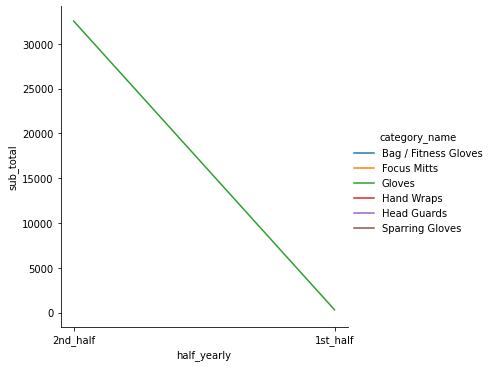

In [91]:
sns.relplot(
    data=sales_category_half_2019, x="half_yearly", y="sub_total",hue='category_name',
    kind="line"
)